In [105]:
import numpy as np
import pandas as pd
from datetime import date, datetime

importiamo il Dataset

In [106]:
prezzo_petrolio = pd.read_csv('BrentOilPrices.csv')

In [107]:
prezzo_petrolio.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [108]:
prezzo_petrolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8554 entries, 0 to 8553
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    8554 non-null   object 
 1   Price   8554 non-null   float64
dtypes: float64(1), object(1)
memory usage: 133.8+ KB


In [109]:
prezzo_petrolio.describe()

,Price
count,8554.000000
mean,46.352962
std,32.165282
min,9.100000
25%,18.850000
50%,33.240000
75%,66.210000
max,143.950000


<AxesSubplot:>

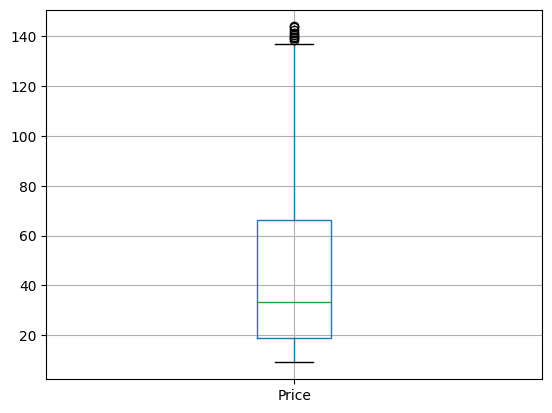

In [110]:
prezzo_petrolio.boxplot()

In [111]:
prezzo_petrolio.columns

Index(['Date', 'Price'], dtype='object')

In [112]:
prezzo_petrolio.isnull().sum()

Date     0
Price    0
dtype: int64

Da una prima analisi le date hanno formati diversi e non ci sono valori nulli.
per prima cosa castomizziamo le date da stringa a un formato datetime
 ed essendo una serie storie giornaleria verifichiamo che ci siano tutti i giorni

In [113]:
prezzo_petrolio['Date'] = pd.to_datetime(prezzo_petrolio['Date'])

contiamo i giorni nel data set 

In [114]:
last_row = prezzo_petrolio.shape[0]
d0 = datetime.date(prezzo_petrolio.iloc[0,0])
d1 = datetime.date(prezzo_petrolio.iloc[last_row-1,0])
delta = d1 - d0

In [115]:
if (delta.days == last_row):
    print('tutto ok i giorni si coincidono')
elif(delta.days > last_row):
    print('mancano dei dati')
elif(delta.days < last_row):
    print('ci sono dati duplicati')

mancano dei dati


abbiamo 8554 record ma contando i giorni dovrebbe essere 12304 ilche vuole che ci sono dei dati mancanti non registrati.
Creamo un nuovo dataset inserendo i giorni mancandi e un valore null e quest'ultimi.

In [116]:
from datetime import timedelta

giorno = datetime.date(prezzo_petrolio.iloc[0,0])
lista = list()
while(giorno<datetime.date(prezzo_petrolio.iloc[last_row-1,0])):
    giorno += timedelta(days=1)
    lista.append([giorno, pd.NA])
len(lista)


12304

In [117]:
prezzo_petrolio_normal = pd.DataFrame(lista, columns=['Date', 'price'])
prezzo_petrolio_normal.head(10)


,Date,price
0,1987-05-21,<NA>
1,1987-05-22,<NA>
2,1987-05-23,<NA>
3,1987-05-24,<NA>
4,1987-05-25,<NA>
5,1987-05-26,<NA>
6,1987-05-27,<NA>
7,1987-05-28,<NA>
8,1987-05-29,<NA>
9,1987-05-30,<NA>


In [118]:
prezzo_petrolio_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12304 entries, 0 to 12303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    12304 non-null  object
 1   price   0 non-null      object
dtypes: object(2)
memory usage: 192.4+ KB


In [119]:
prezzo_petrolio_normal['Date'] = pd.to_datetime(prezzo_petrolio_normal['Date'])

In [120]:
df_new = pd.merge(prezzo_petrolio, prezzo_petrolio_normal, how='right')
df_new.drop('price', axis=1, inplace=True)


In [121]:
df_new.head()

,Date,Price
0,1987-05-21,18.45
1,1987-05-22,18.55
2,1987-05-23,NaN
3,1987-05-24,NaN
4,1987-05-25,18.60


In [122]:
df_new.isnull().sum()

Date        0
Price    3751
dtype: int64

Adesso abbiamo 3751 valori null proprio i giorni che mancano nel conteggio.

In [123]:
dati_mancanti = df_new['Price'].isnull().sum()/df_new.shape[0]*100
print(f"la percentuale di dati mancanti è del {round(dati_mancanti,2)}%" )

la percentuale di dati mancanti è del 30.49%


In [124]:
df_new['Price'] = df_new.Price.interpolate()
df_new['Price'] = df_new.Price.round(2)

In [125]:
df_new.head()

,Date,Price
0,1987-05-21,18.45
1,1987-05-22,18.55
2,1987-05-23,18.57
3,1987-05-24,18.58
4,1987-05-25,18.60


<AxesSubplot:>

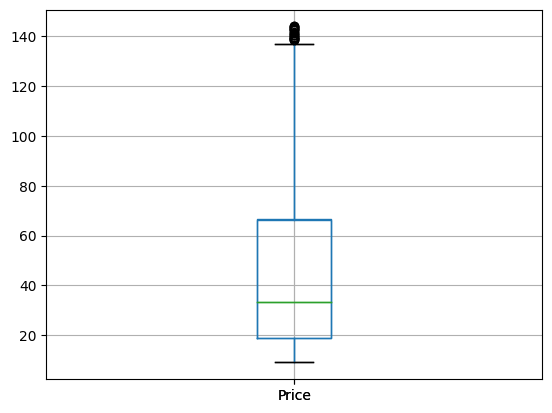

In [126]:
df_new.boxplot()
prezzo_petrolio.boxplot()

In [127]:
dati_mancanti = df_new['Price'].isnull().sum()/df_new.shape[0]*100
print(f"la percentuale di dati mancanti è del {round(dati_mancanti,2)}%" )

la percentuale di dati mancanti è del 0.0%


In [128]:
df_new.to_csv('prezzo_pretrolio.csv', index= False)

In [129]:
import matplotlib.pyplot as plt

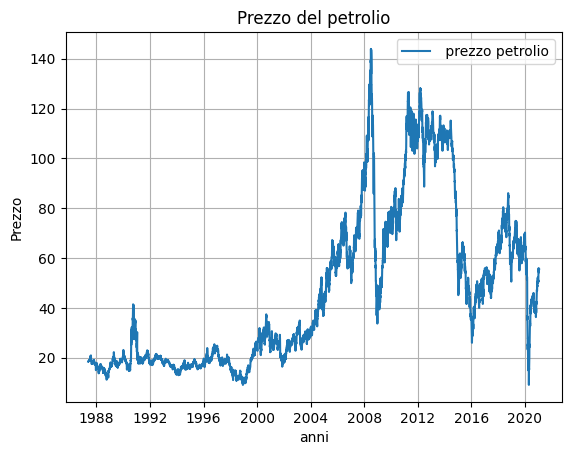

In [130]:
plt.plot(df_new.Date,df_new.Price, label = " prezzo petrolio")
plt.title("Prezzo del petrolio")
plt.xlabel("anni")
plt.ylabel("Prezzo")
plt.legend()
plt.grid()
plt.show()

In [131]:
df_media_anno = df_new.groupby(df_new.Date.dt.year).mean()
df_media_anno.head()

,Price
Date,
1987,18.521244
1988,14.954044
1989,18.261973
1990,23.702384
1991,20.030521


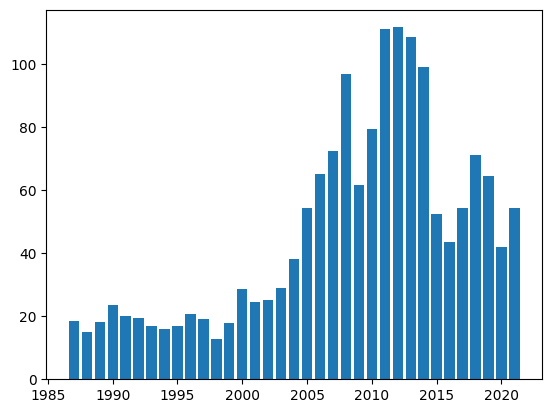

In [132]:
plt.bar(df_media_anno.index, df_media_anno.Price)
plt.show()

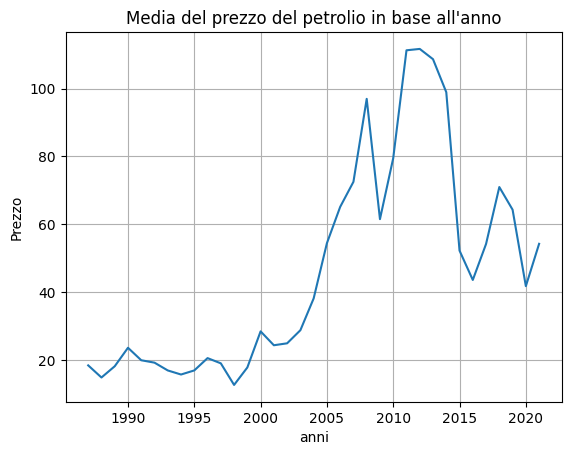

In [133]:
plt.plot(df_media_anno.index, df_media_anno.Price)
plt.title("Media del prezzo del petrolio in base all'anno")
plt.xlabel("anni")
plt.ylabel("Prezzo")
plt.grid()
plt.show()

In [134]:
import calendar
df_media_mese = df_new.groupby(df_new.Date.dt.month).mean()
df_media_mese["mese"] = df_media_mese.index
df_media_mese.mese = df_media_mese.mese.apply(lambda mese: calendar.month_abbr[mese])

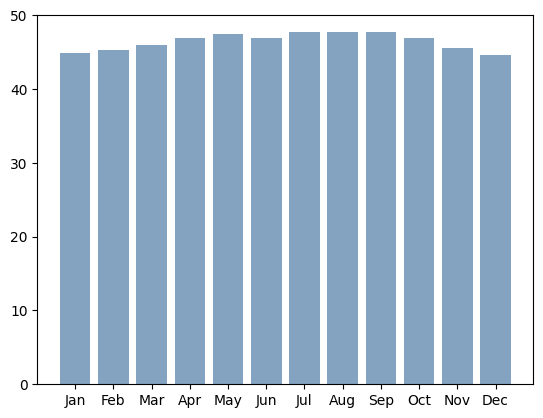

In [135]:
plt.bar(df_media_mese.mese, df_media_mese.Price,color=(0.2, 0.4, 0.6, 0.6))
plt.show()

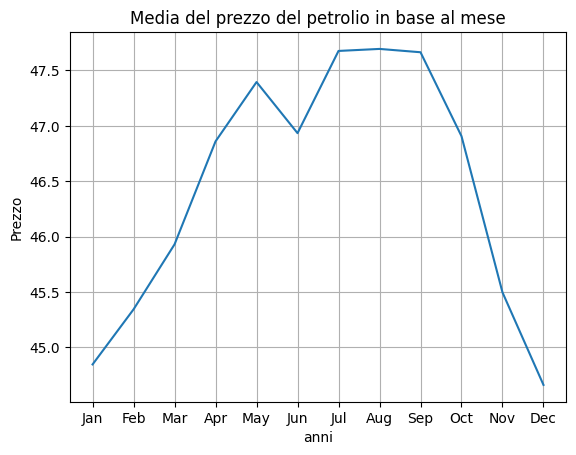

In [136]:
plt.plot(df_media_mese.mese, df_media_mese.Price)
plt.title("Media del prezzo del petrolio in base al mese")
plt.xlabel("anni")
plt.ylabel("Prezzo")
plt.grid()
plt.show()